# 1. Importing Librares - 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import scipy.stats as st

## Pandas: Used for data manipulation and analysis.
## Matplotlib.pyplot: A plotting library for creating static, animated, and interactive visualizations.
## Seaborn: A data visualization library based on matplotlib that provides a high-level interface for drawing attractive and informative statistical graphics.
## Numpy: A library for numerical computations.
## Scipy.stats: Provides functions for statistical analysis.

# 2. Loading and Exploring Data

In [6]:
data=pd.read_csv("C:/Users/singh/Downloads/Country-data.csv")

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [8]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [9]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


# 3. Checking for Missing Values and Unique Categories

In [12]:
# missing values
data.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [13]:
data['country'].nunique()

167

# 4. Visualizing Data Distributions

In [14]:
cols=data.select_dtypes(exclude='object').columns
cols
#sns.boxplot(data[])

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

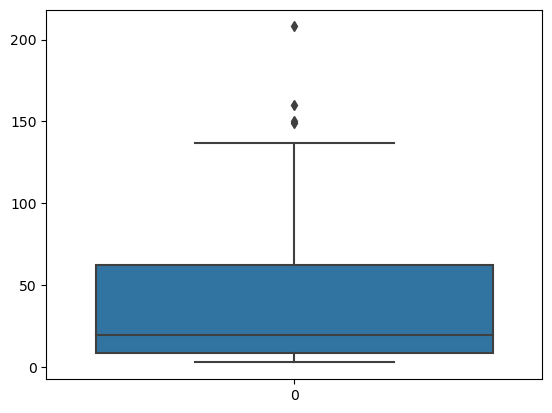

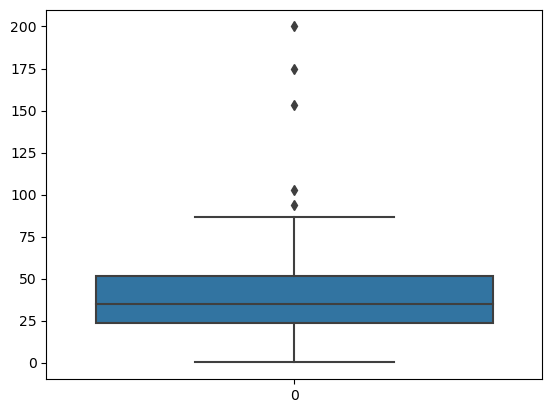

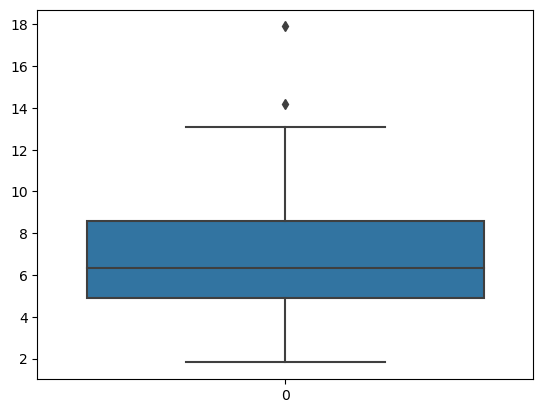

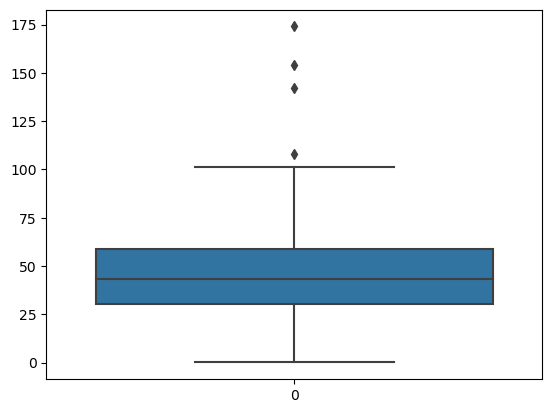

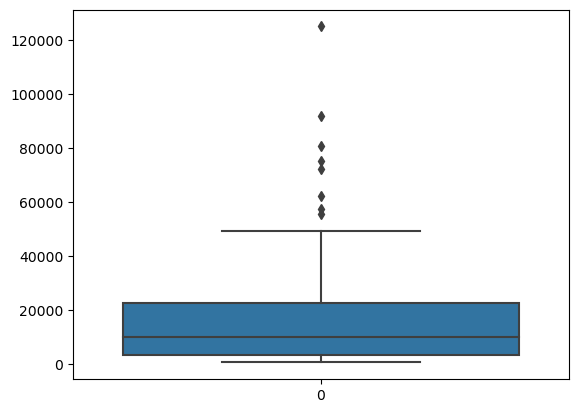

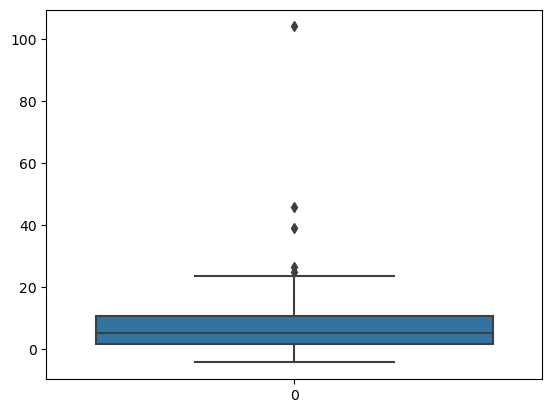

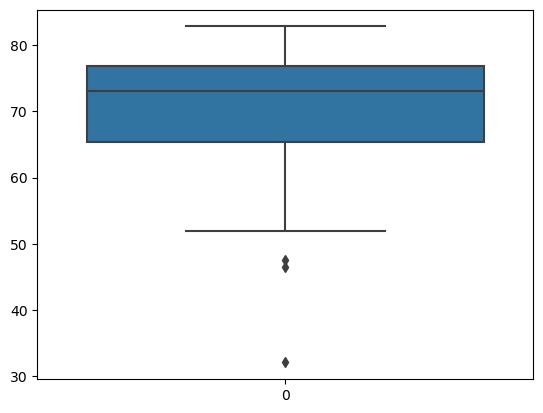

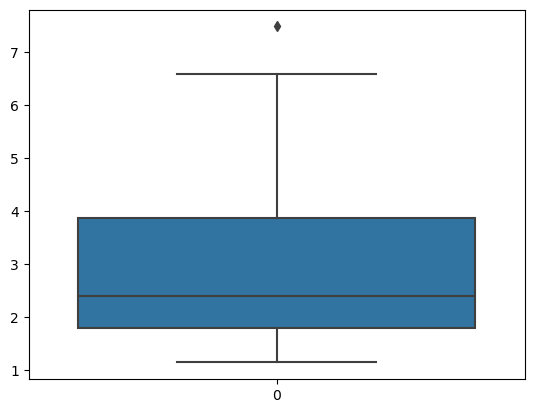

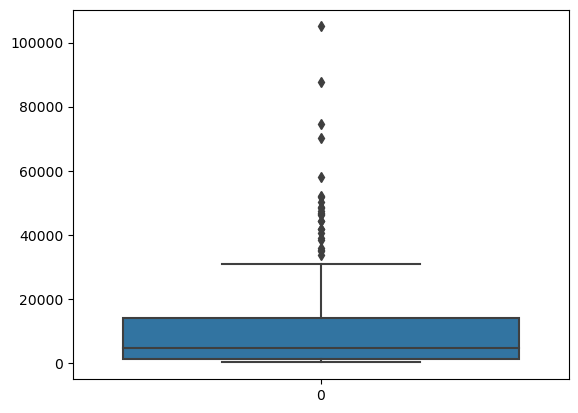

In [15]:
for x in cols:
    sn.boxplot(data[x])
    plt.show()

# 5. Removing Outliers

In [16]:
# removing outliers
def rem_outlier(df, col):
    Q3=np.quantile(df[col],0.75)
    Q1=np.quantile(df[col],0.25)
    IQR= Q3-Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    print("lower bound & upper bound of %s is %f and %f" %(col,lower_bound,upper_bound))
    

In [17]:
for x in cols:
    rem_outlier(data, x)

lower bound & upper bound of child_mort is -72.525000 and 142.875000
lower bound & upper bound of exports is -17.525000 and 92.675000
lower bound & upper bound of health is -0.600000 and 14.120000
lower bound & upper bound of imports is -12.625000 and 101.575000
lower bound & upper bound of income is -25812.500000 and 51967.500000
lower bound & upper bound of inflation is -11.600000 and 24.160000
lower bound & upper bound of life_expec is 48.050000 and 94.050000
lower bound & upper bound of total_fer is -1.332500 and 7.007500
lower bound & upper bound of gdpp is -17750.000000 and 33130.000000


In [20]:
df=data.copy()

# 6. Handling Outliers with Winsorization

In [21]:
from scipy.stats.mstats import winsorize
for x in cols:
    df[x]=winsorize(df[x], limits=(0.05,.05))

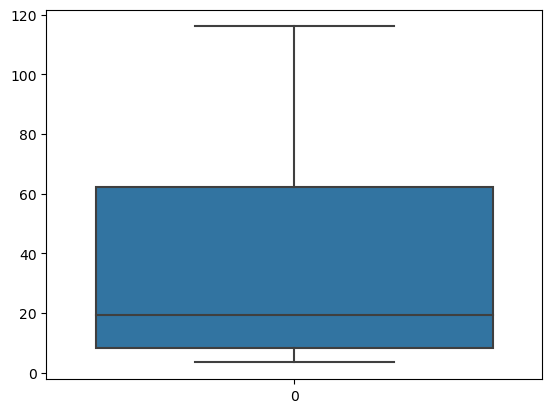

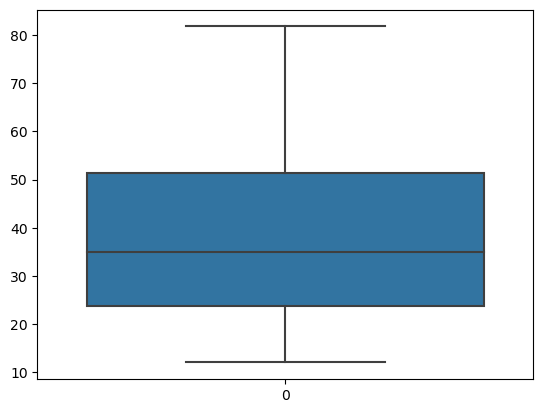

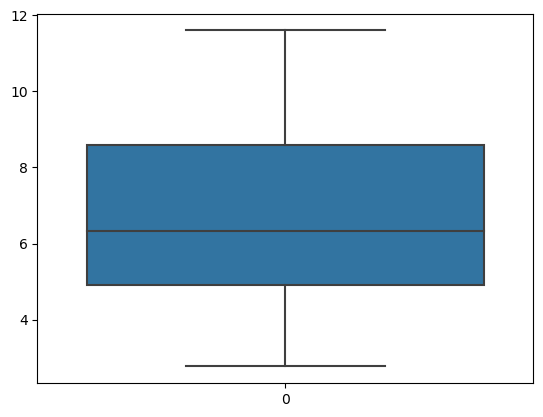

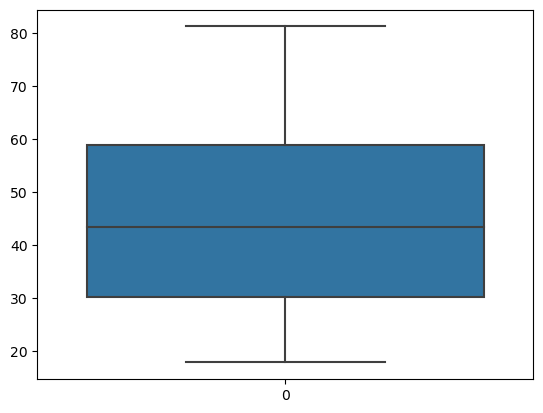

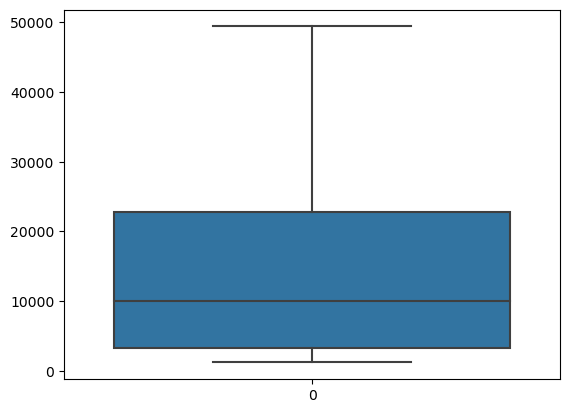

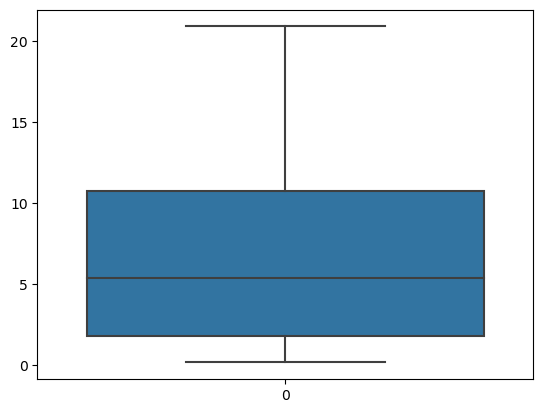

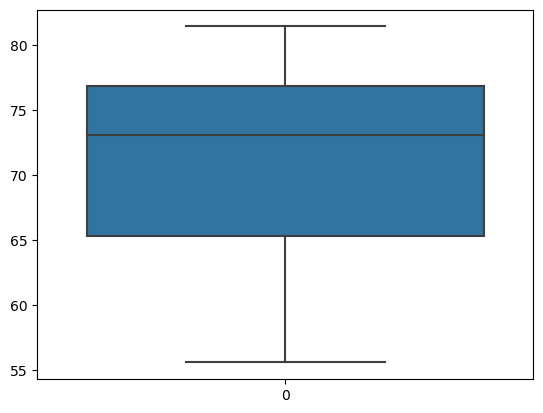

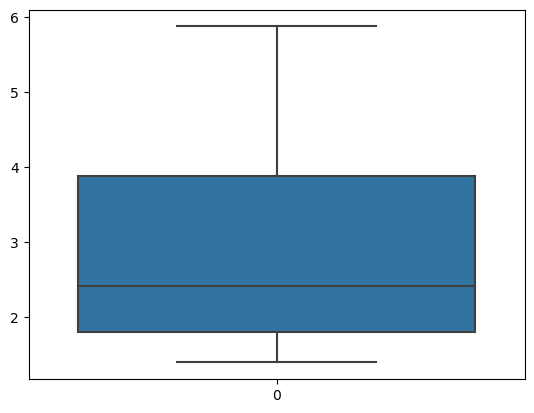

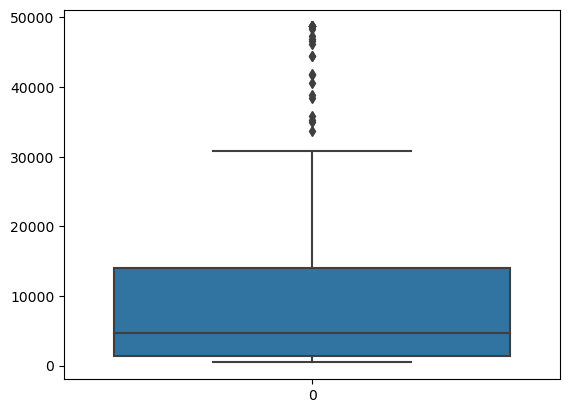

In [22]:
for x in cols:
    sn.boxplot(df[x])
    plt.show()

In [23]:
df['gdpp']=winsorize(df['gdpp'], limits=(0,.15))

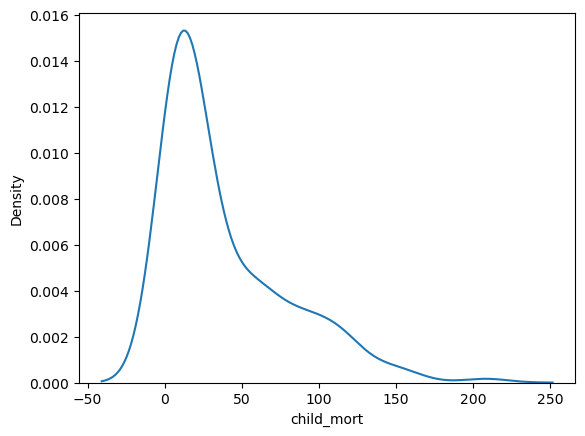

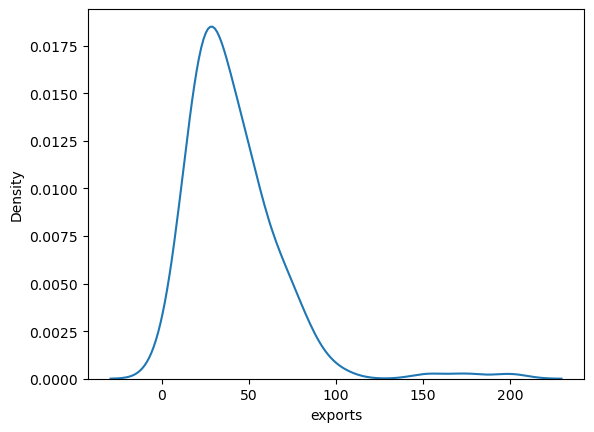

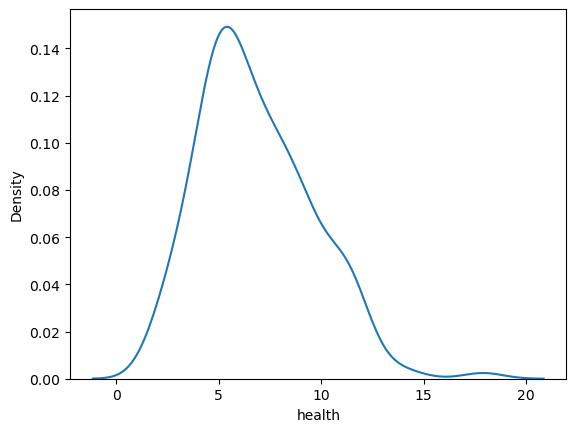

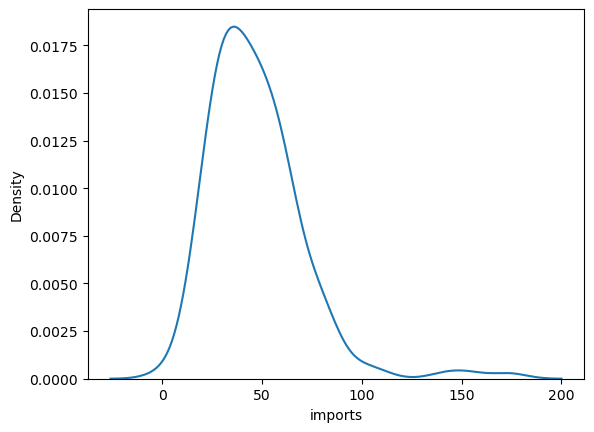

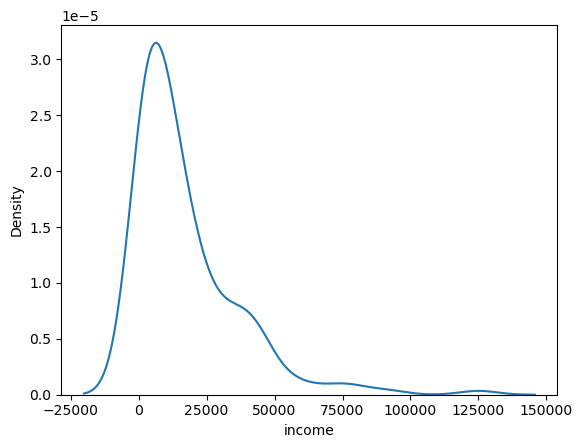

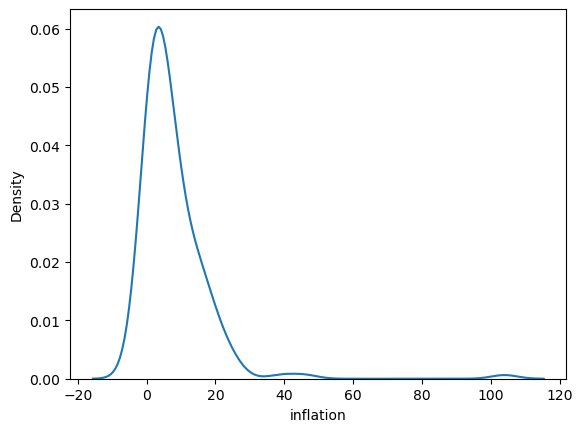

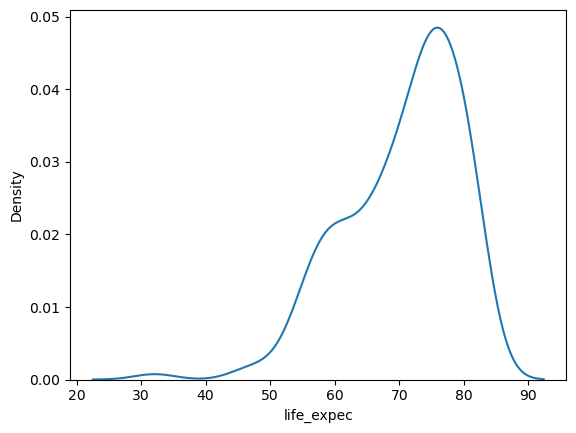

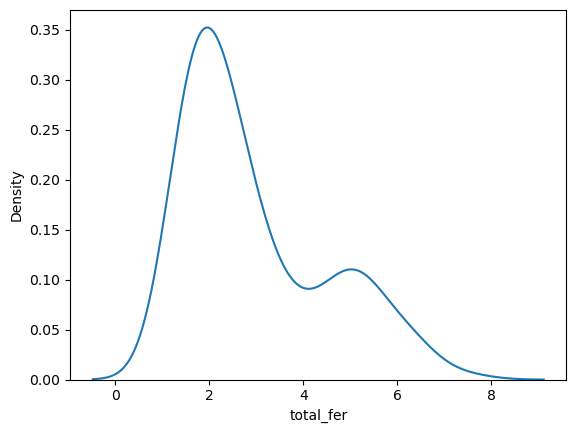

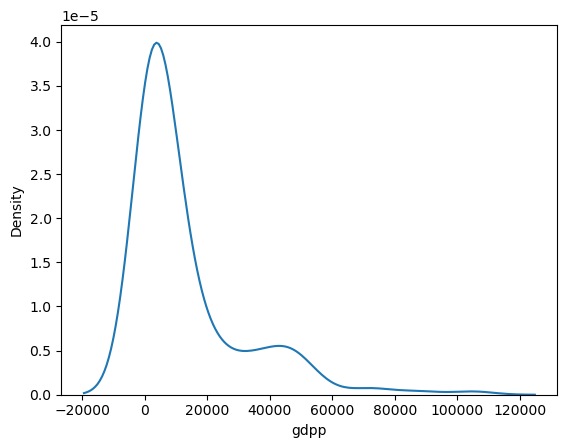

In [22]:
for i in cols:
    sn.kdeplot(data=data, x=i)
    plt.show()

In [23]:
df.describe()

C:\Users\singh\anaconda3\lib\site-packages\numpy\lib\function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
C:\Users\singh\anaconda3\lib\site-packages\numpy\lib\function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
C:\Users\singh\anaconda3\lib\site-packages\numpy\lib\function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
C:\Users\singh\anaconda3\lib\site-packages\numpy\lib\function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
C:\Users\singh\anaconda3\lib\site-packages\numpy\lib\function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
C:\Users\singh\anaconda3\lib\site-packages\numpy\lib\function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArra

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.00000
mean,36.805389,39.370659,6.767904,45.349701,15815.149701,7.016431,70.820359,2.922874,10007.00000
std,36.196830,20.034751,2.534195,18.336647,14904.603391,6.276378,8.057568,1.439262,10929.82389
min,3.400000,12.000000,2.770000,17.800000,1210.000000,0.160000,55.600000,1.390000,459.00000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.00000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.00000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.00000
max,116.000000,81.800000,11.600000,81.200000,49400.000000,20.900000,81.400000,5.870000,30800.00000


In [24]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [25]:
sorted_by_child_mort=data.sort_values(by='child_mort', ascending=False)
sorted_by_income=data.sort_values(by='income', ascending=False)
sorted_by_life_expec=data.sort_values(by='life_expec', ascending=False)

In [26]:
top_5_child_mort=sorted_by_child_mort.head(5)
low_5_child_mort=sorted_by_child_mort.tail(5)
top_5_income=sorted_by_income.head()
low_5_income=sorted_by_income.tail()
top_5_life_expec=sorted_by_life_expec.head()
low_5_life_expec=sorted_by_life_expec.tail()

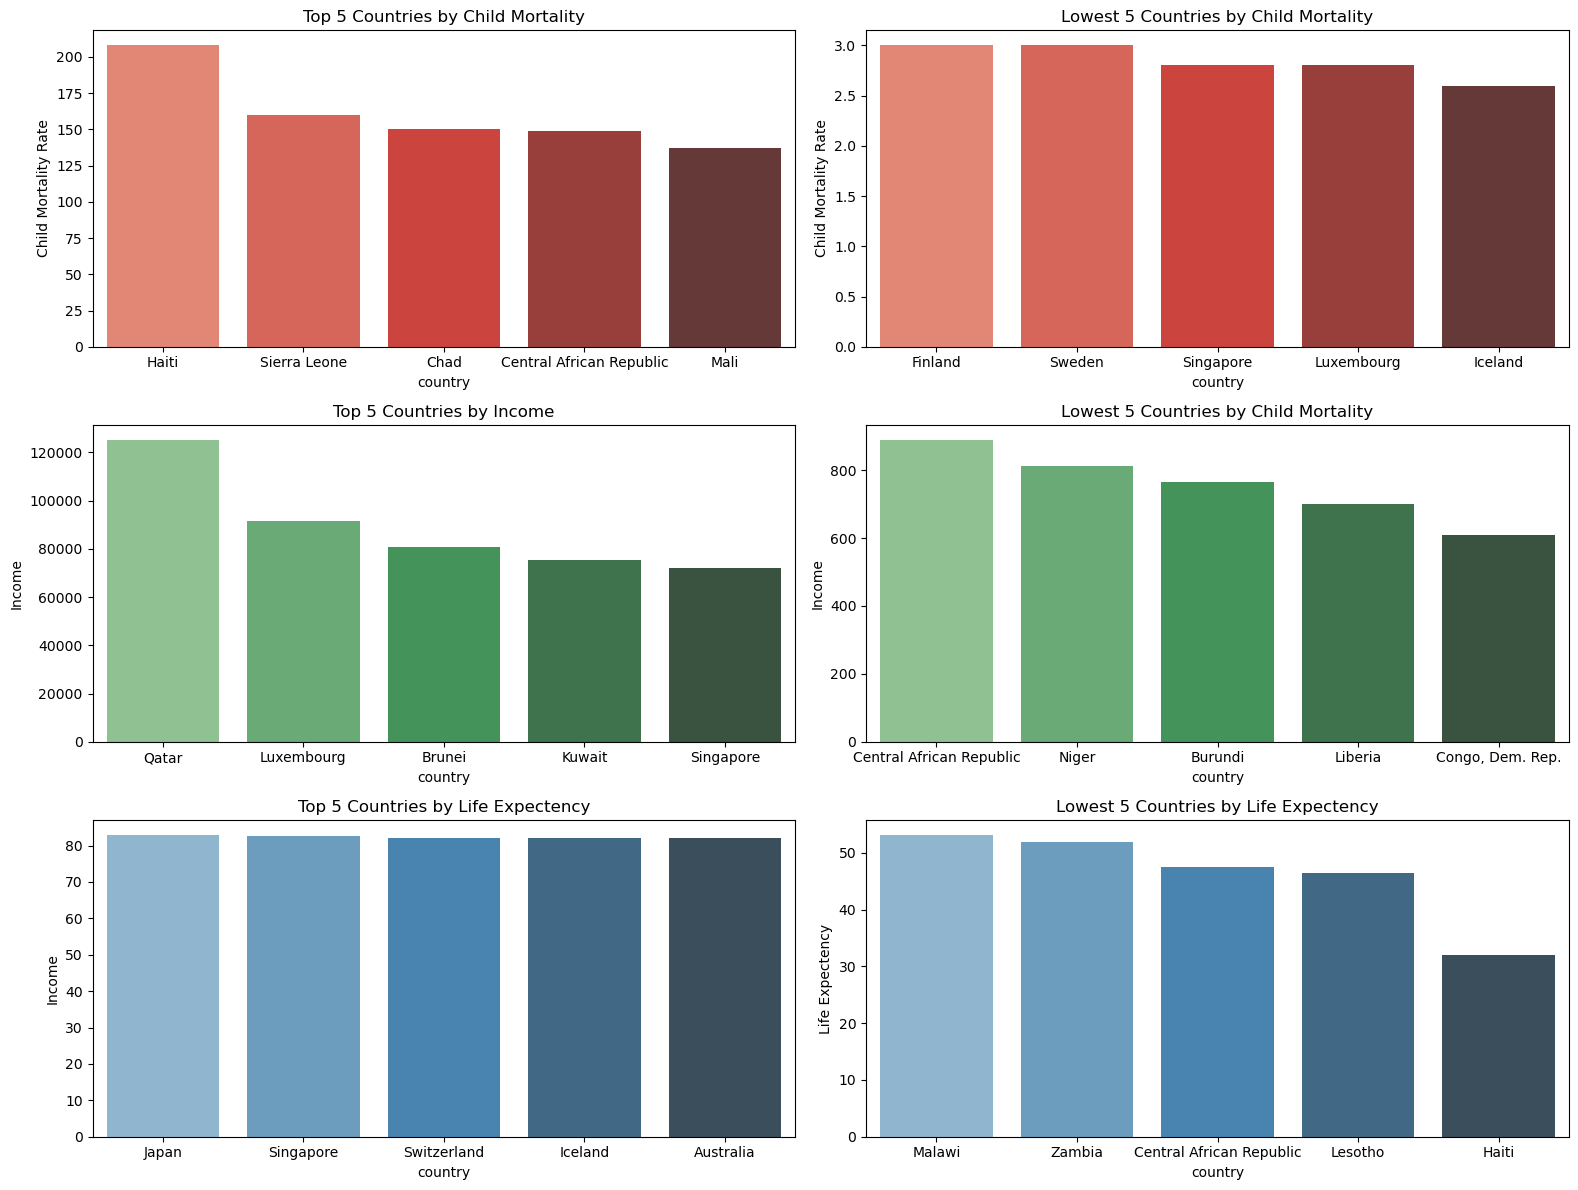

In [27]:
fig,axis= plt.subplots(3,2,figsize=(16,12))
# by Child Mortality rate
sn.barplot(x=top_5_child_mort['country'],y=top_5_child_mort['child_mort'], ax=axis[0,0],palette='Reds_d')
axis[0, 0].set_title('Top 5 Countries by Child Mortality')
axis[0, 0].set_ylabel('Child Mortality Rate')
sn.barplot(x=low_5_child_mort['country'],y=low_5_child_mort['child_mort'], ax=axis[0,1],palette='Reds_d')
axis[0, 1].set_title('Lowest 5 Countries by Child Mortality')
axis[0, 1].set_ylabel('Child Mortality Rate')

# by income
sn.barplot(x=top_5_income['country'],y=top_5_income['income'], ax=axis[1,0],palette='Greens_d')
axis[1, 0].set_title('Top 5 Countries by Income')
axis[1, 0].set_ylabel('Income')
sn.barplot(x=low_5_income['country'],y=low_5_income['income'], ax=axis[1,1],palette='Greens_d')
axis[1, 1].set_title('Lowest 5 Countries by Child Mortality')
axis[1, 1].set_ylabel('Income')

# by Life Expectency
sn.barplot(x=top_5_life_expec['country'],y=top_5_life_expec['life_expec'], ax=axis[2,0],palette='Blues_d')
axis[2, 0].set_title('Top 5 Countries by Life Expectency')
axis[2, 0].set_ylabel('Income')
sn.barplot(x=low_5_life_expec['country'],y=low_5_life_expec['life_expec'], ax=axis[2,1],palette='Blues_d')
axis[2, 1].set_title('Lowest 5 Countries by Life Expectency')
axis[2, 1].set_ylabel('Life Expectency')

plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.tight_layout()
plt.show()

In [185]:
corr=data.corr()
corr

,silhouette_scores,KMeans_Cluster,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,DBSCAN_Cluster,Hierarchical_Cluster
silhouette_scores,1.000000,0.793078,0.563054,-0.137594,0.045995,-0.105205,-0.012463,0.160566,-0.435189,0.573505,0.058561,0.074605,0.094055
KMeans_Cluster,0.793078,1.000000,0.825541,-0.316106,-0.166429,-0.134006,-0.466464,0.344214,-0.764669,0.831902,-0.407826,-0.027359,0.413252
child_mort,0.563054,0.825541,1.000000,-0.318093,-0.200402,-0.127211,-0.524315,0.288276,-0.886676,0.848478,-0.483032,0.002483,0.375745
exports,-0.137594,-0.316106,-0.318093,1.000000,-0.114408,0.737381,0.516784,-0.107294,0.316313,-0.320011,0.418725,0.474028,-0.178073
health,0.045995,-0.166429,-0.200402,-0.114408,1.000000,0.095717,0.129579,-0.255376,0.210692,-0.196674,0.345966,-0.125168,-0.415660
imports,-0.105205,-0.134006,-0.127211,0.737381,0.095717,1.000000,0.122406,-0.246994,0.054391,-0.159048,0.115498,0.361049,-0.234945
income,-0.012463,-0.466464,-0.524315,0.516784,0.129579,0.122406,1.000000,-0.147756,0.611962,-0.501840,0.895571,0.423152,-0.428048
inflation,0.160566,0.344214,0.288276,-0.107294,-0.255376,-0.246994,-0.147756,1.000000,-0.239705,0.316921,-0.221631,0.243228,0.494483
life_expec,-0.435189,-0.764669,-0.886676,0.316313,0.210692,0.054391,0.611962,-0.239705,1.000000,-0.760875,0.600089,0.083218,-0.323493
total_fer,0.573505,0.831902,0.848478,-0.320011,-0.196674,-0.159048,-0.501840,0.316921,-0.760875,1.000000,-0.454910,-0.057964,0.350091


<h6>child_mort pos=total_fer  neg=life_expec <br>
exports=pos imports<br>
health= none<br>
income= pos gdpp<br>
life expec= pos income, gdpp neg= total_fer

<AxesSubplot:>

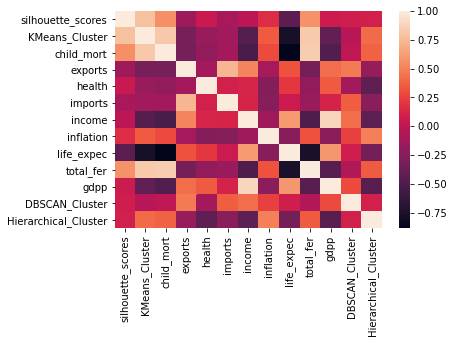

In [186]:
sn.heatmap(corr)

In [187]:
k=5
cl=corr.nlargest(k,'life_expec')['life_expec'].index
cl

Index(['life_expec', 'income', 'gdpp', 'exports', 'health'], dtype='object')

In [188]:
cm=np.corrcoef(data[cl].values.T)
cm

array([[ 1.        ,  0.61196247,  0.60008913,  0.3163126 ,  0.21069212],
       [ 0.61196247,  1.        ,  0.89557143,  0.5167836 ,  0.12957861],
       [ 0.60008913,  0.89557143,  1.        ,  0.41872475,  0.34596553],
       [ 0.3163126 ,  0.5167836 ,  0.41872475,  1.        , -0.1144084 ],
       [ 0.21069212,  0.12957861,  0.34596553, -0.1144084 ,  1.        ]])

<AxesSubplot:>

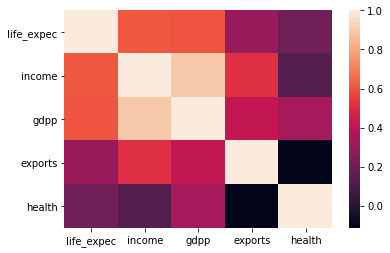

In [189]:
sn.heatmap(cm, yticklabels=cl.values, xticklabels=cl.values)

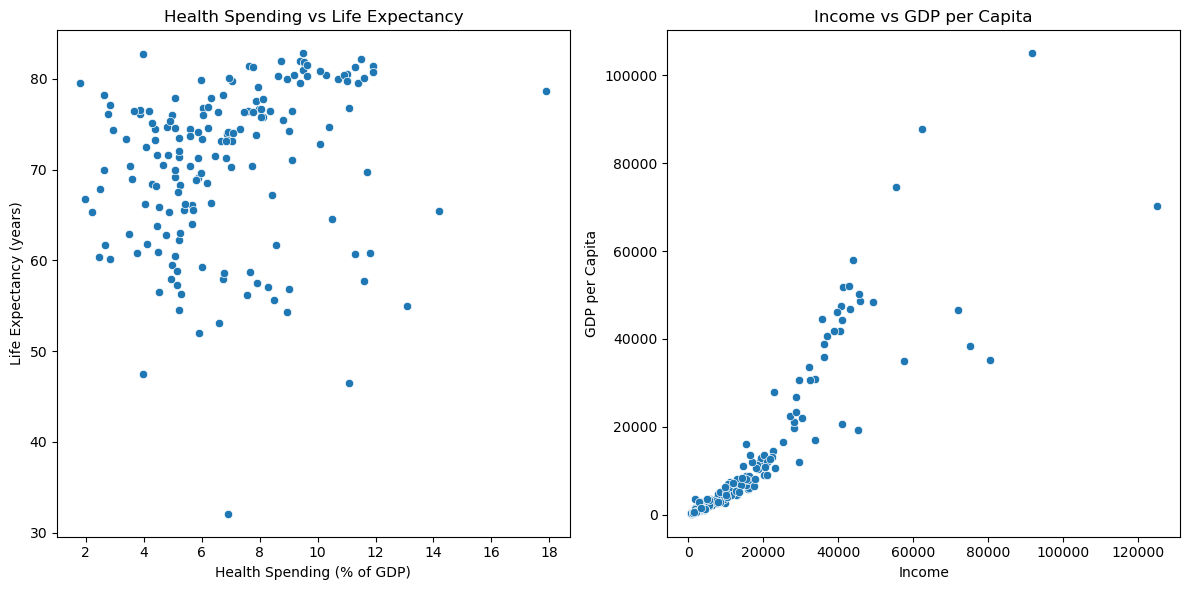

In [31]:
# Scatter plot for health vs. life_expec
plt.figure(figsize=(12, 6))

# Scatter plot for Health spending vs Life Expectancy
plt.subplot(1, 2, 1)
sn.scatterplot(data=data, x='health', y='life_expec')
plt.title('Health Spending vs Life Expectancy')
plt.xlabel('Health Spending (% of GDP)')
plt.ylabel('Life Expectancy (years)')

# Scatter plot for Income vs GDP per Capita
plt.subplot(1, 2, 2)
sn.scatterplot(data=data, x='income', y='gdpp')
plt.title('Income vs GDP per Capita')
plt.xlabel('Income')
plt.ylabel('GDP per Capita')

plt.tight_layout()
plt.show()

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
scaler= StandardScaler()
numerical_features = ['income', 'exports']
data[numerical_features]=scaler.fit_transform(data[numerical_features])

In [36]:
data['mortality_level'] = data['child_mort'].apply(lambda x: 1 if x >= 50 else (2 if x<50 and x>14 else 3))

In [37]:
data[data['child_mort']>=50].value_counts().sum()

50

In [38]:
data[(data['child_mort']<50) & (data['child_mort']>14)].value_counts().sum()

56

In [39]:
data[data['child_mort']<=14].value_counts().sum()

61

In [40]:
data['exports_imports_Ratio'] = data['exports'] / data['imports']

In [7]:
# encoding country names
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder(sparse=False)
country_one_hot = one_hot_encoder.fit_transform(data[['country']])

C:\Users\richa\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [10]:
country_df = pd.DataFrame(country_one_hot, columns=one_hot_encoder.get_feature_names_out(['country']))
country_df

,country_Afghanistan,country_Albania,country_Algeria,country_Angola,country_Antigua and Barbuda,country_Argentina,country_Armenia,country_Australia,country_Austria,country_Azerbaijan,...,country_United Arab Emirates,country_United Kingdom,country_United States,country_Uruguay,country_Uzbekistan,country_Vanuatu,country_Venezuela,country_Vietnam,country_Yemen,country_Zambia
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
163,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
164,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
165,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [11]:
data_encoded = pd.concat([data, country_df], axis=1).drop('country', axis=1)

### Conducts t-tests to compare the means of life expectancy, child mortality, and GDP per capita across the "high" and "low" groups.

In [42]:
# Hypothesis Tests 

median_health = data['health'].median()
median_income = data['income'].median()
median_inflation = data['inflation'].median()

In [49]:
# Function of Categoroze data into high and low groups

def categorize(value, median):
    return 'high' if value > median else 'low'

# Categorize data based on meedian values

data['health_category'] = data['health'].apply(categorize, median=median_health)
data['income_category'] = data['income'].apply(categorize, median=median_income)
data['inflation_category'] = data['inflation'].apply(categorize, median=median_inflation)

# Extracting data for tests

life_exp_high_health = data[data['health_category'] == 'high']['life_expec']
life_exp_low_health = data[data['health_category'] == 'low']['life_expec']

child_mort_high_income = data[data['income_category'] == 'high']['child_mort']
child_mort_low_income = data[data['income_category'] == 'low']['child_mort']

gdpp_high_inflation = data[data['inflation_category'] == 'high']['gdpp']
gdpp_low_inflation = data[data['inflation_category'] == 'low']['gdpp']

# T-tests

t_test_health_life_exp = stats.ttest_ind(life_exp_high_health, life_exp_low_health)
t_test_income_child_mort = stats.ttest_ind(child_mort_high_income, child_mort_low_income)
t_test_inflation_gdpp = stats.ttest_ind(gdpp_high_inflation, gdpp_low_inflation)


# Correlation analysis

correlation_income_child_mort = stats.pearsonr(data['income'], data['child_mort'])
correlation_inflation_gdpp = stats.pearsonr(data['inflation'], data['gdpp'])


# Output results

print(f"T-test for Health Spending and Life Expectancy: statistic={t_test_health_life_exp.statistic}, p-value={t_test_health_life_exp.pvalue}")
print(f"T-test for Income and Child Mortality: statistic={t_test_income_child_mort.statistic}, p-value={t_test_income_child_mort.pvalue}")
print(f"T-test for Inflation and GDP per Capita: statistic={t_test_inflation_gdpp.statistic}, p-value={t_test_inflation_gdpp.pvalue}")

print(f"Correlation between Income and Child Mortality: r={correlation_income_child_mort[0]}, p-value={correlation_income_child_mort[1]}")
print(f"Correlation between Inflation and GDP per Capita: r={correlation_inflation_gdpp[0]}, p-value={correlation_inflation_gdpp[1]}")

T-test for Health Spending and Life Expectancy: statistic=2.934400353862084, p-value=0.0038183094454471724
T-test for Income and Child Mortality: statistic=-10.186018565020449, p-value=3.2785691051974e-19
T-test for Inflation and GDP per Capita: statistic=-3.6881176832049887, p-value=0.000306330363917195
Correlation between Income and Child Mortality: r=-0.5243150164994347, p-value=3.538801381630264e-13
Correlation between Inflation and GDP per Capita: r=-0.22163105810153866, p-value=0.003995984320917074


<Figure size 1500x1000 with 0 Axes>

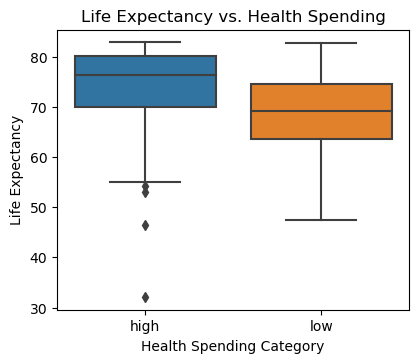

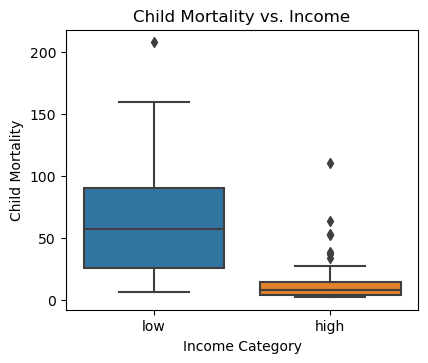

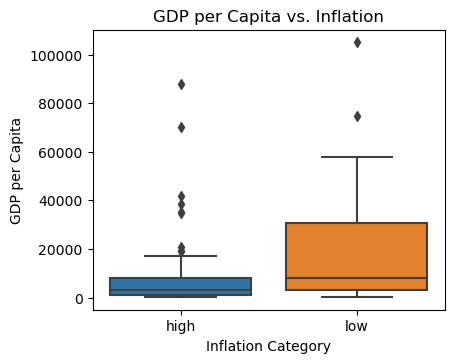

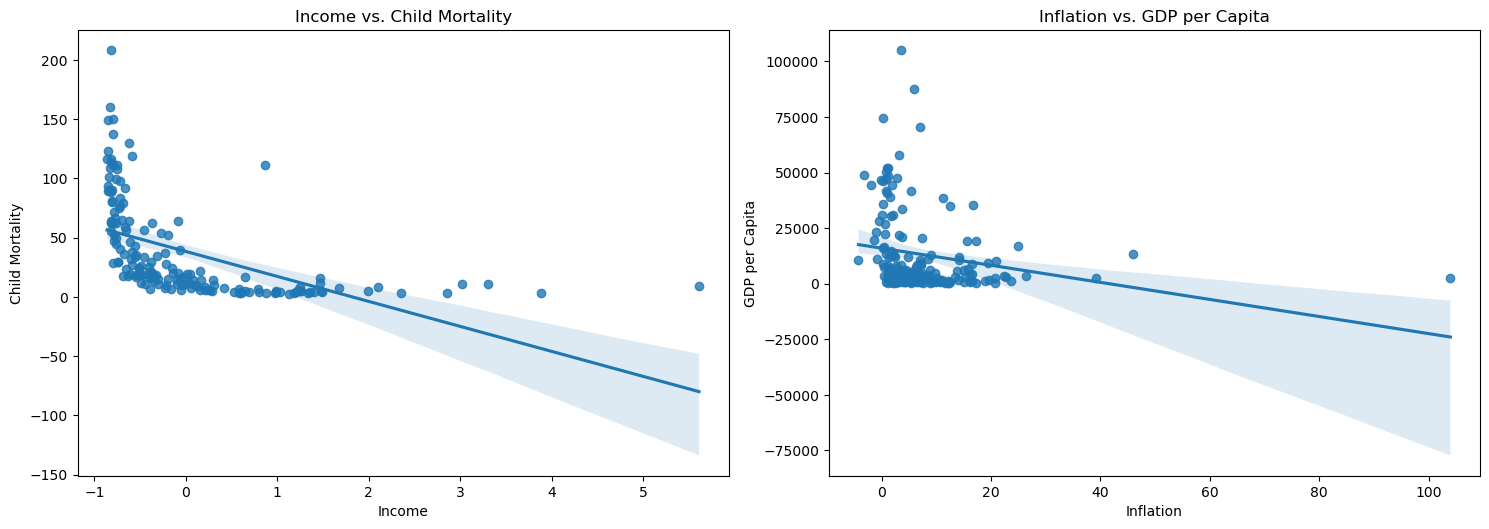

In [58]:
# Categorize data based on meedian values

data['health_category'] = data['health'].apply(categorize, median=median_health)
data['income_category'] = data['income'].apply(categorize, median=median_income)
data['inflation_category'] = data['inflation'].apply(categorize, median=median_inflation)

# Extracting data for tests

# T-test visualization
plt.figure(figsize=(15, 10))

# Health Spending vs. Life Expectancy

plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1)
sn.boxplot(x='health_category', y='life_expec', data=data)
plt.title('Life Expectancy vs. Health Spending')
plt.xlabel('Health Spending Category')
plt.ylabel('Life Expectancy')
plt.show()

# Income vs. Child Mortality

plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 2) 
sn.boxplot(x='income_category', y='child_mort', data=data)
plt.title('Child Mortality vs. Income')
plt.xlabel('Income Category')
plt.ylabel('Child Mortality')
plt.show()

# Inflation vs. GDP per Capita

plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 3)
sn.boxplot(x='inflation_category', y='gdpp', data=data)
plt.title('GDP per Capita vs. Inflation')
plt.xlabel('Inflation Category')
plt.ylabel('GDP per Capita')
plt.show()

# Correlation Analysis visualization
plt.figure(figsize=(15, 10))

# Income vs. Child Mortality

plt.subplot(2, 2, 1)
sn.regplot(x='income', y='child_mort', data = data)
plt.title('Income vs. Child Mortality')
plt.xlabel('Income')
plt.ylabel('Child Mortality')

# Inflation vs. GDP per Capita

plt.subplot(2, 2, 2)
sn.regplot(x='inflation', y='gdpp', data = data)
plt.title('Inflation vs. GDP per Capita')
plt.xlabel('Inflation')
plt.ylabel('GDP per Capita')

plt.tight_layout()
plt.show()

# Model Selection

In [4]:
# Kmeans Model

# Selecting number of clusters required

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [12]:
#elbow method
inertia=[]
k_range=range(1,11)
for k in k_range:
    kmeans= KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_encoded)
    inertia.append(kmeans.inertia_)

C:\Users\richa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\richa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\richa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\richa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

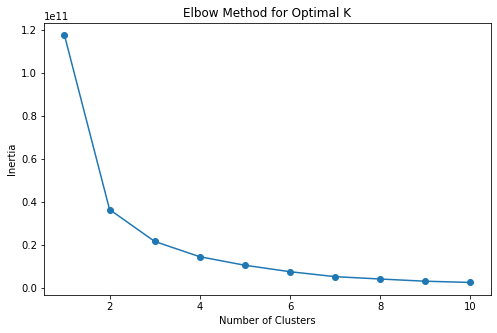

In [13]:
# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

C:\Users\richa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\richa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\richa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\richa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

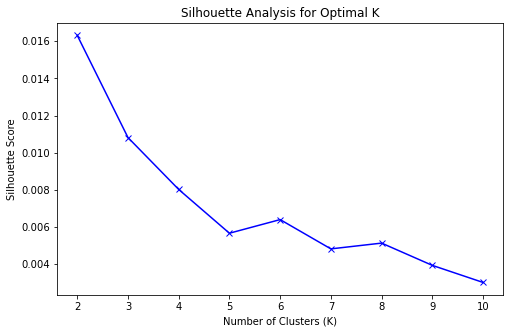

In [22]:
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_encoded)


k_range = range(2, 11)  # silhouette score is not defined for 1 cluster
silhouette_avg = []

for num_clusters in k_range:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(data_scaled)
    cluster_labels = kmeans.labels_
    # Silhouette score
    silhouette_avg.append(silhouette_score(data_scaled, cluster_labels))


plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_avg, 'bx-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal K')
plt.show()

In [24]:
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(data_scaled)
data_encoded['KMeans_Cluster'] = kmeans_labels

C:\Users\richa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\richa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [25]:
data_encoded

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,country_Afghanistan,...,country_United Kingdom,country_United States,country_Uruguay,country_Uzbekistan,country_Vanuatu,country_Venezuela,country_Vietnam,country_Yemen,country_Zambia,KMeans_Cluster
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1


In [27]:
data = pd.concat([data_encoded['KMeans_Cluster'], data], axis=1)

In [28]:
data[data['KMeans_Cluster']==1]

,KMeans_Cluster,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1,Afghanistan,90.2,10.000,7.58,44.9000,1610,9.440,56.2,5.82,553
3,1,Angola,119.0,62.300,2.85,42.9000,5900,22.400,60.1,6.16,3530
17,1,Benin,111.0,23.800,4.10,37.2000,1820,0.885,61.8,5.36,758
25,1,Burkina Faso,116.0,19.200,6.74,29.6000,1430,6.810,57.9,5.87,575
26,1,Burundi,93.6,8.920,11.60,39.2000,764,12.300,57.7,6.26,231
28,1,Cameroon,108.0,22.200,5.13,27.0000,2660,1.910,57.3,5.11,1310
31,1,Central African Republic,149.0,11.800,3.98,26.5000,888,2.010,47.5,5.21,446
32,1,Chad,150.0,36.800,4.53,43.5000,1930,6.390,56.5,6.59,897
36,1,Comoros,88.2,16.500,4.51,51.7000,1410,3.870,65.9,4.75,769
37,1,"Congo, Dem. Rep.",116.0,41.100,7.91,49.6000,609,20.800,57.5,6.54,334


In [32]:
from sklearn.metrics import silhouette_samples
silhouette_scores = silhouette_samples(data_encoded, kmeans.labels_)
data_encoded['silhouette_scores']=silhouette_scores
data_encoded

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,country_Afghanistan,...,country_United States,country_Uruguay,country_Uzbekistan,country_Vanuatu,country_Venezuela,country_Vietnam,country_Yemen,country_Zambia,KMeans_Cluster,silhouette_scores
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.893414
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,-0.618014
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,-0.490444
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.773124
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,-0.072709
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,-0.853287
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0.113570
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,-0.854149
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0.850427


In [33]:
data = pd.concat([data_encoded['silhouette_scores'], data], axis=1)

In [35]:
data.sort_values(by='silhouette_scores')

,silhouette_scores,KMeans_Cluster,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
12,-0.893992,0,Bangladesh,49.4,16.0,3.52,21.8,2440,7.140,70.4,2.33,758
27,-0.893214,0,Cambodia,44.4,54.1,5.68,59.5,2520,3.120,66.1,2.88,786
83,-0.890062,0,Kyrgyz Republic,29.6,51.6,6.18,81.7,2790,10.000,68.5,3.10,880
102,-0.866176,0,Moldova,17.2,39.2,11.70,78.5,3910,11.100,69.7,1.27,1630
161,-0.860553,0,Uzbekistan,36.3,31.7,5.81,28.5,4240,16.500,68.8,2.34,1380
...,...,...,...,...,...,...,...,...,...,...,...,...
147,0.893955,1,Tanzania,71.9,18.7,6.01,29.1,2090,9.250,59.3,5.43,702
146,0.893958,1,Tajikistan,52.4,14.9,5.98,58.6,2110,12.500,69.6,3.51,738
32,0.894446,1,Chad,150.0,36.8,4.53,43.5,1930,6.390,56.5,6.59,897
97,0.894646,1,Mali,137.0,22.8,4.98,35.1,1870,4.370,59.5,6.55,708


In [37]:
data[data['KMeans_Cluster']==0]

,silhouette_scores,KMeans_Cluster,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
1,-0.618014,0,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,-0.490444,0,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
4,-0.072709,0,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
5,-0.128817,0,Argentina,14.5,18.9,8.10,16.0,18700,20.90,75.8,2.37,10300
6,-0.758966,0,Armenia,18.1,20.8,4.40,45.3,6700,7.77,73.3,1.69,3220
...,...,...,...,...,...,...,...,...,...,...,...,...
159,0.296787,0,United States,7.3,12.4,17.90,15.8,49400,1.22,78.7,1.93,48400
160,-0.149408,0,Uruguay,10.6,26.3,8.35,25.4,17100,4.91,76.4,2.08,11900
161,-0.860553,0,Uzbekistan,36.3,31.7,5.81,28.5,4240,16.50,68.8,2.34,1380
162,-0.853287,0,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970


# DBSCAN

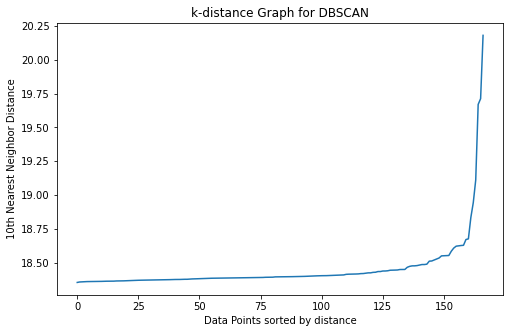

In [38]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import numpy as np

# Use NearestNeighbors to find the optimal epsilon
nearest_neighbors = NearestNeighbors(n_neighbors=11)
neighbors = nearest_neighbors.fit(data_scaled)
distances, indices = neighbors.kneighbors(data_scaled)
distances = np.sort(distances[:, 10], axis=0)

# Plot k-distance graph
plt.figure(figsize=(8, 5))
plt.plot(distances)
plt.xlabel('Data Points sorted by distance')
plt.ylabel('10th Nearest Neighbor Distance')
plt.title('k-distance Graph for DBSCAN')
plt.show()

In [143]:
eps = 18.60
min_samples = 1
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan_labels = dbscan.fit_predict(data_scaled)

# Add cluster labels to the dataset
data['DBSCAN_Cluster'] = dbscan_labels

In [144]:
data[data['DBSCAN_Cluster']==1]

,silhouette_scores,KMeans_Cluster,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,DBSCAN_Cluster,Hierarchical_Cluster
66,0.892769,1,Haiti,208.0,15.3,6.91,64.7,1500,5.45,32.1,3.33,662,1,2


In [145]:
data['DBSCAN_Cluster'].unique()

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

# Hierarchical Clustering

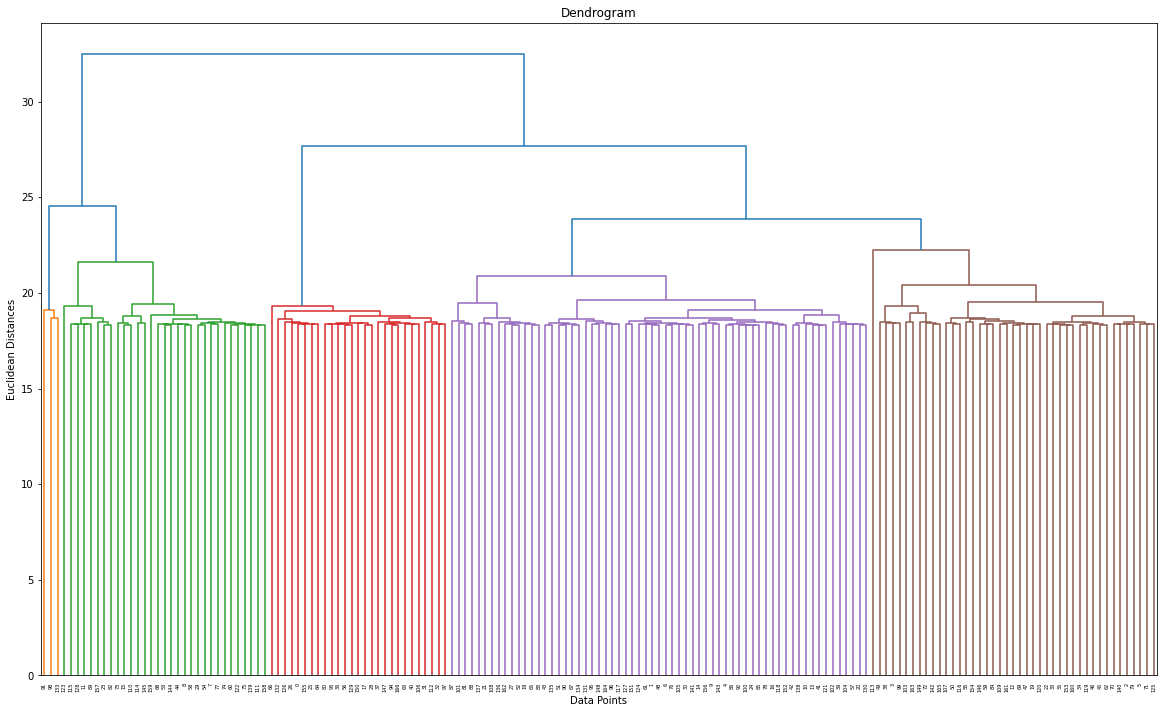

In [171]:
import scipy.cluster.hierarchy as sch

# Create a dendrogram
plt.figure(figsize=(20, 12))
dendrogram = sch.dendrogram(sch.linkage(data_scaled, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distances')
plt.show()

In [178]:
from sklearn.cluster import AgglomerativeClustering

optimal_clusters = 6
hierarchical = AgglomerativeClustering(n_clusters=optimal_clusters, affinity='euclidean', linkage='ward')
hierarchical_labels = hierarchical.fit_predict(data_scaled)

# Add cluster labels to the dataset
data['Hierarchical_Cluster'] = hierarchical_labels


C:\Users\richa\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [183]:
data[data['Hierarchical_Cluster']==2]

,silhouette_scores,KMeans_Cluster,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,DBSCAN_Cluster,Hierarchical_Cluster
0,0.893414,1,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,0,2
17,0.894752,1,Benin,111.0,23.80,4.10,37.2,1820,0.885,61.8,5.36,758,0,2
25,0.892288,1,Burkina Faso,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575,0,2
26,0.876524,1,Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231,0,2
28,0.887444,1,Cameroon,108.0,22.20,5.13,27.0,2660,1.910,57.3,5.11,1310,0,2
31,0.881655,1,Central African Republic,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446,0,2
32,0.894446,1,Chad,150.0,36.80,4.53,43.5,1930,6.390,56.5,6.59,897,0,2
36,0.891990,1,Comoros,88.2,16.50,4.51,51.7,1410,3.870,65.9,4.75,769,0,2
37,0.873713,1,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.800,57.5,6.54,334,0,2
40,0.887881,1,Cote d'Ivoire,111.0,50.60,5.30,43.3,2690,5.390,56.3,5.27,1220,0,2
